In [9]:
import csv
import re
import datetime as dt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [34]:
dates = []
prices = []

with open("BTC_data.csv") as csvfile:
    reader = list(csv.reader(csvfile))[1::]
    for i in range(len(reader)):
        date = reader[i][0]
        datenew = re.sub(r"[^\w]", "", date)
        dates.append(int(datenew))
        prices.append(float(reader[i][1]))

#priceslog = [log10(x) for x in prices]
prices_log = []
for i in range(len(prices)):
    price = prices[i]
    #price = inst[0]
    if price == 0:
        prices_log.append(1)
    else:
        log_price = log10(price)
        prices_log.append(log_price)

#for i in range(len(data3)):
#    inst = data3[i]
#    plt.scatter(i, inst[0], marker='o', color='red')
dates_log = dates[::-1] 
prices_log = prices_log[::-1]
##prices_log = [log10(x) for x in prices]
#print(type(dates_log))

dates_plot0 = [dt.datetime.strptime(reader[i][0],'%Y-%m-%d').date() for i in range(len(reader))]
dates_plot = dates_plot0[::-1]

print(len(dates_log))
print(len(dates))
print(dates_plot)

2276
2276
[datetime.date(2011, 9, 13), datetime.date(2011, 9, 14), datetime.date(2011, 9, 15), datetime.date(2011, 9, 16), datetime.date(2011, 9, 17), datetime.date(2011, 9, 18), datetime.date(2011, 9, 19), datetime.date(2011, 9, 20), datetime.date(2011, 9, 21), datetime.date(2011, 9, 22), datetime.date(2011, 9, 23), datetime.date(2011, 9, 24), datetime.date(2011, 9, 25), datetime.date(2011, 9, 26), datetime.date(2011, 9, 27), datetime.date(2011, 9, 28), datetime.date(2011, 9, 29), datetime.date(2011, 9, 30), datetime.date(2011, 10, 1), datetime.date(2011, 10, 2), datetime.date(2011, 10, 3), datetime.date(2011, 10, 4), datetime.date(2011, 10, 5), datetime.date(2011, 10, 6), datetime.date(2011, 10, 7), datetime.date(2011, 10, 8), datetime.date(2011, 10, 9), datetime.date(2011, 10, 10), datetime.date(2011, 10, 11), datetime.date(2011, 10, 12), datetime.date(2011, 10, 13), datetime.date(2011, 10, 14), datetime.date(2011, 10, 15), datetime.date(2011, 10, 16), datetime.date(2011, 10, 17), d

In [3]:
#split to test data and train data

train_dates0 = dates_log[:1800]
train_prices0 = prices_log[:1800] 
test_dates0 = dates_log[1800:]
test_prices0 = prices_log[1800:]

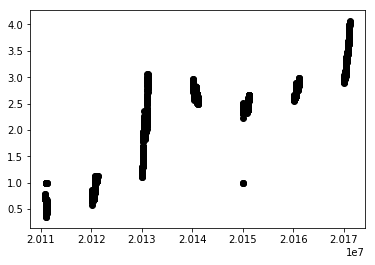

In [4]:
dates_mat = np.reshape(dates_plot,(len(dates_log),1)) # converting to matrix of n X 1
prices_mat = np.reshape(prices_log,(len(prices_log),1))
plt.scatter(dates_mat, prices_mat, color= 'black', label= 'Data') # plotting the initial datapoints 
plt.show()


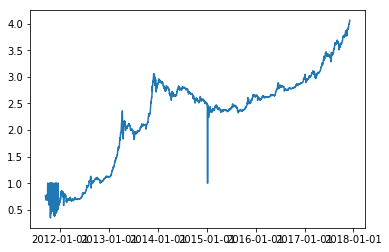

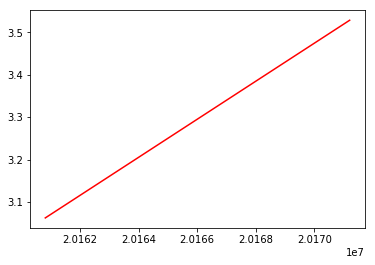

[[20160817]
 [20160818]
 [20160819]
 [20160820]
 [20160821]
 [20160822]
 [20160823]
 [20160824]
 [20160825]
 [20160826]
 [20160827]
 [20160828]
 [20160829]
 [20160830]
 [20160831]
 [20160901]
 [20160902]
 [20160903]
 [20160904]
 [20160905]
 [20160906]
 [20160907]
 [20160908]
 [20160909]
 [20160910]
 [20160911]
 [20160912]
 [20160913]
 [20160914]
 [20160915]
 [20160916]
 [20160917]
 [20160918]
 [20160919]
 [20160920]
 [20160921]
 [20160922]
 [20160923]
 [20160924]
 [20160925]
 [20160926]
 [20160927]
 [20160928]
 [20160929]
 [20160930]
 [20161001]
 [20161002]
 [20161003]
 [20161004]
 [20161005]
 [20161006]
 [20161007]
 [20161008]
 [20161009]
 [20161010]
 [20161011]
 [20161012]
 [20161013]
 [20161014]
 [20161015]
 [20161016]
 [20161017]
 [20161018]
 [20161019]
 [20161020]
 [20161021]
 [20161022]
 [20161023]
 [20161024]
 [20161025]
 [20161026]
 [20161027]
 [20161028]
 [20161029]
 [20161030]
 [20161031]
 [20161101]
 [20161102]
 [20161103]
 [20161104]
 [20161105]
 [20161106]
 [20161107]
 [20

In [35]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.plot(dates_plot, prices_log)
plt.show()
plt.plot(test_dates, LR2.predict(test_dates), color= 'red', label= 'Linear model') # plotting the line made by linear regression
plt.show()
plt.gcf().autofmt_xdate()
print test_dates

In [5]:
# Reshape train and test data

train_dates = np.reshape(train_dates0,(len(train_dates0),1)) # converting to matrix of n X 1
train_prices = np.reshape(train_prices0,(len(train_prices0),1))
test_dates = np.reshape(test_dates0,(len(test_dates0),1)) 
test_prices = np.reshape(test_prices0,(len(test_prices0),1))

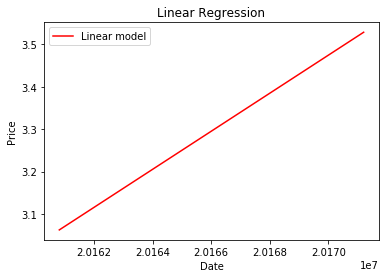

In [25]:
# Linear regression test on TEST SET

from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

LR2 = LinearRegression()
LR2.fit(train_dates, train_prices) 

plt.scatter(dates_mat, prices_mat, color= 'black', label= 'Data') # plotting the initial datapoints 
plt.plot(test_dates, LR2.predict(test_dates), color= 'red', label= 'Linear model') # plotting the line made by linear regression
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Linear Regression')
plt.legend()
plt.show()